In [2]:
# Needed to import the pyavatar folder
import os
import sys
code_path = os.path.abspath(os.path.join('..'))
if code_path not in sys.path:
    sys.path.append(code_path)

In [3]:
import os
import numpy as np
import scipy.io
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
from scipy.stats.stats import pearsonr
from scipy.signal import butter, lfilter

from pyavatar.utilities import get_distance_wall, exclude_input_nodes, discard_warm_up_time, low_pass_filter

import pdb

Below I am plotting `ws` and the distance from the wall from three simulations with different alphas(very low, medium and very high alpha values). The first one is for ahigh alpha

## Low Alpha (0.0002)

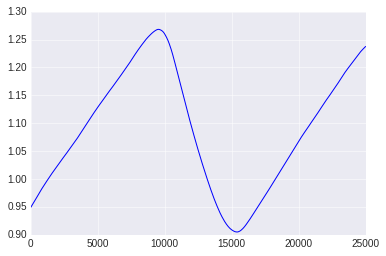

In [3]:
bpt1 = '../Output/simulation/with_behaviour/w_search/testn_17/alpha_0.0002.mat'
sim_t1 = scipy.io.loadmat(bpt1)
sim_ni_t1 = exclude_input_nodes(sim_t1)
sim_ni_t1 = discard_warm_up_time(sim_t1)
plt.plot(np.mean(sim_ni_t1['ws'], axis=1))


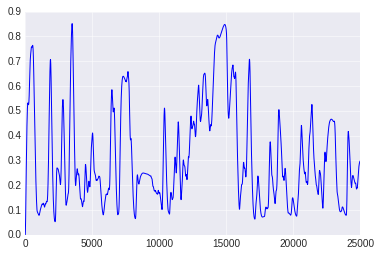

In [4]:
cutoff = 0.6 # Hz
fs = 300 # Hz
order = 2
dd1 = get_distance_wall(sim_ni_t1)
dd1 =low_pass_filter(cutoff, fs, order, dd1)
plt.plot(dd1)

## Medium Alpha (0.0070)

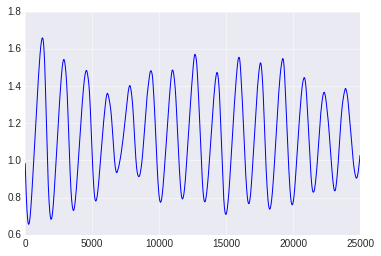

In [5]:
bpt2 = '../Output/simulation/with_behaviour/w_search/testn_17/alpha_0.0070.mat'
sim_t2 = scipy.io.loadmat(bpt2)
sim_ni_t2 = exclude_input_nodes(sim_t2)
sim_ni_t2 = discard_warm_up_time(sim_t2)
plt.plot(np.mean(sim_ni_t2['ws'], axis=1))

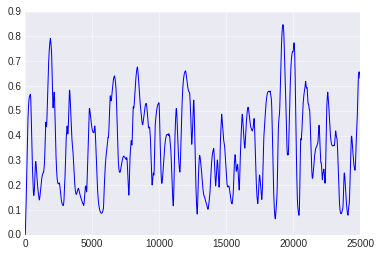

In [6]:
cutoff = 0.6 # Hz
fs = 300 # Hz
order = 2
dd2 = get_distance_wall(sim_ni_t2)
dd2 =low_pass_filter(cutoff, fs, order, dd2)
plt.plot(dd2)

## High Alpha (0.0002)

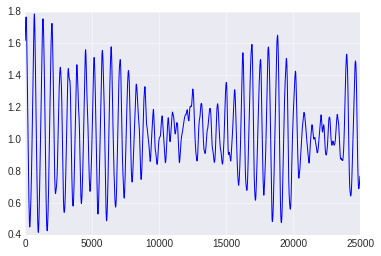

In [7]:
bpt3 = '../Output/simulation/with_behaviour/w_search/testn_17/alpha_0.0420.mat'
sim_t3 = scipy.io.loadmat(bpt3)
sim_ni_t3 = exclude_input_nodes(sim_t3)
sim_ni_t3 = discard_warm_up_time(sim_t3)
plt.plot(np.mean(sim_ni_t3['ws'], axis=1))

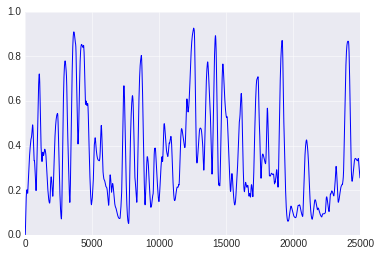

In [8]:
cutoff = 0.6 # Hz
fs = 300 # Hz
order = 2
dd3 = get_distance_wall(sim_ni_t3)
dd3 =low_pass_filter(cutoff, fs, order, dd3)
plt.plot(dd3)

# Pearson's Correlation

In [12]:
# Pearson correlation of the 3 samples
print 'low alpha'
print pearsonr(np.mean(sim_ni_t1['ws'], axis=1), dd1)
print 'middle alpha'
print pearsonr(np.mean(sim_ni_t2['ws'], axis=1), dd2)
print 'high alpha'
print pearsonr(np.mean(sim_ni_t3['ws'], axis=1), dd3)

low alpha
(-0.34426867274882794, 0.0)
middle alpha
(-0.23243670301819547, 7.0110855427852269e-304)
high alpha
(-0.14466751169982134, 5.3709483980992927e-117)


## Plot the regions where there is a strange behaviour on the gridsearch analysis of DFW-ws correlation

In [5]:
path1 = '../Output/dynamic_analysis/with_behaviour/gridsearch/testn_18/gridsearch2/gridsearch_0.00001.pickle'
with open(path1) as fh:
    gridsearch = pickle.load(fh)
# obtain data of interest (targets= 0.45, 0.50)


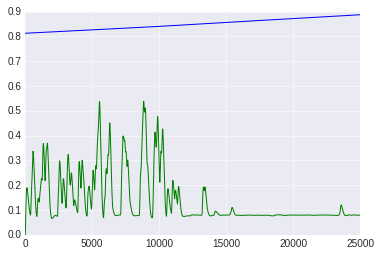

In [6]:
# very low alpha (Figure 1)
plt.plot(gridsearch['0.45']['mean_ws_over_time'])
plt.plot(gridsearch['0.45']['distance_wall'])

In [8]:
path2 = '../Output/dynamic_analysis/with_behaviour/gridsearch/testn_18/gridsearch2/gridsearch_0.00024.pickle'
with open(path2) as fh:
    gridsearch2 = pickle.load(fh)

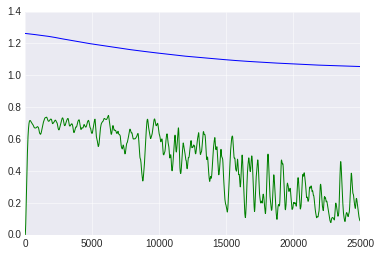

In [12]:
# very high target (Figure 2)
plt.plot(gridsearch2['0.70']['mean_ws_over_time'])
plt.plot(gridsearch2['0.70']['distance_wall'])

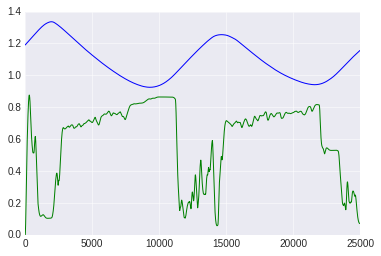

In [9]:
# just a very cool behaviour
plt.plot(gridsearch2['0.45']['mean_ws_over_time'])
plt.plot(gridsearch2['0.45']['distance_wall'])


In [29]:
path2 = '../Output/dynamic_analysis/with_behaviour/gridsearch/testn_19/gridsearch2/gridsearch_0.00002.pickle'
with open(path) as fh:
    gridsearch4 = pickle.load(fh)